# Fractional Investing Model
Testing a scenario where a Unit Registry transfers fractions to a Customer and makes a calculation on what to purchase @ Market

In [2]:
import pandas as pd
import numpy as np
import random
from random import choice
import math
from IPython.display import display, Image

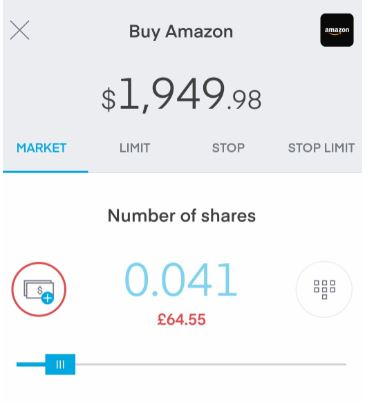

In [4]:
display(Image(filename='trading212.jpg'))

In [2]:
def pound_buy_order_generator():

    simulations = 5
    unit_order = []
    pound_order = []
    stock_price = round(random.uniform(0,5),2)
    print('__________')
    print('####Client Buy Order####')
    print('Stock Price = ' + str(stock_price))

    for i in range(simulations):
        order = round(random.uniform(1,1000),0)
        share_instruction = round(order/stock_price,2)
        print('Customer ' + str(i+1) + ' £' + str(order) + ' ' + str(share_instruction) + ' shares')
        unit_order.append(share_instruction)
        pound_order.append(order)
        i+=1

    pound_order = round(sum(pound_order),2)
    stock_order = round(sum(unit_order),2)
    
    fractional_order,whole_order = math.modf(stock_order)
    fractional_order = round(fractional_order,2)
    print('Total Stock Purchase Amount = ' + str(stock_order))
    print('Total £ = ' + str(pound_order))
    print(' ')
    
    return fractional_order,whole_order,stock_order

    

In [3]:
def pound_sell_order_generator():

    simulations = 2
    unit_order = []
    pound_order = []
    stock_price = round(random.uniform(0.5,1),2)
    print('')
    print('<<<<Client Sell Order>>>>')
    print('Stock Price = ' + str(stock_price))

    for i in range(simulations):
        order = -1 * round(random.uniform(1,1000),0)
        share_instruction = round(order/stock_price,2)
        print('Customer ' + str(i+1) + ' £' + str(order) + ' ' + str(share_instruction) + ' shares')
        unit_order.append(share_instruction)
        pound_order.append(order)
        i+=1

    pound_order = round(sum(pound_order),2)
    stock_order = round(sum(unit_order),2)
    
    fractional_order,whole_order = math.modf(stock_order)
    fractional_order = round(fractional_order,2)
    print('Total £ = ' + str(pound_order))
    print('Total Stock Sell Amount = ' + str(stock_order) + ' units')
    print('Fraction Amount = ' + str(round(-1*fractional_order,2)) + ' units')
    print('<<<<>>>>')
    print(' ')
    
    return fractional_order,whole_order,stock_order

In [4]:
def ticket_instruction(registry):

    random_list = [0,1]
    random_list_pick = random.choice(random_list)
    
    function_selector = [pound_buy_order_generator, pound_sell_order_generator]
        
    random_function_selector = function_selector[random_list_pick]
    ticket = random_function_selector()
    
    fractional_order, whole_shares, total_order = ticket
    
    print('Whole Share Transaction = ' + str(whole_shares))
    print('Fraction Share Order = ' + str(fractional_order))
    print('')
    
    return fractional_order, total_order, whole_shares

In [5]:
def purchase_instruction(registry):

    ticket = pound_buy_order_generator()
    fractional_order = ticket[0]
    whole_shares = ticket[1]
    total_order = ticket[2]
    print('Whole Share Purchase = ' + str(whole_shares))
    print('Fraction Share Order = ' + str(fractional_order))

    balance_check = round((registry - fractional_order),2)


    return fractional_order, total_order, whole_shares

In [6]:
def fraction_model():

    trading_window = 3
    reg_count = []
    registry = 1
    start_amount = 0
    client_start = 0
    purchases = 1
    capacity = 2

    for i in range(trading_window):
        print('TRANSACTION ' + str(i+1))
        print('Registry = ' + str(round(registry,2)))

        if i == 0:
            fractional_order, total_order, whole_shares = purchase_instruction(registry)
        else:
            fractional_order, total_order, whole_shares = ticket_instruction(registry)
            
        if total_order > 0:
            if fractional_order > registry:

                client_fractional_purchase = round((fractional_order-registry),2)
                fraction_purchase = round((1 - client_fractional_purchase),2)

                print('####TRANSFER#####')
                print('Transfer to Client = ' + str(round(registry,2)))
                print('#####TRADE Ticket#####')
                print('Client Order Whole Shares = ' + str(whole_shares))
                print('PLUS Client Funds Purchase = ' + str(client_fractional_purchase))
                print('PLUS Registry Purchase = ' + str(fraction_purchase))
                print('TICKET Total = ' + str(whole_shares+client_fractional_purchase+fraction_purchase))
                purchases += 1
                registry = 1 + round((registry - fractional_order),2)

            else:
                registry = round((registry - fractional_order),2)
                print('----------')
                print('#####TRADE Ticket#####')
                print('Client Order Whole Shares = ' + str(whole_shares))
                print('Fractional Transfer to Client from Registry = ' + str(fractional_order))
                print('----------')

        else:
            ticket_sell_instruction = math.floor(total_order)
            sell_fraction_amount = -1 * fractional_order

            if sell_fraction_amount <= (capacity - registry):
                print('----------')
                print('####TRANSFER#####')
                print('Registry Purchase from Clients = ' + str(sell_fraction_amount))
                print('#####TRADE Ticket#####')
                print('Client Ticket Instruction  = ' + str(-1 * whole_shares))
                print('----------')
                registry = registry + sell_fraction_amount

            else:
                print('----------')
                print('#####TRADE Ticket#####')
                print('Client Ticket Instruction  = ' + str(ticket_sell_instruction) + ' units')
                prop_up_amount = round((1 - sell_fraction_amount),2)
                print('Prop up trade to whole unit = ' + str(prop_up_amount))

                registry = registry - prop_up_amount

                print('----------')

        start_amount += total_order
        client_start += whole_shares

        print('')
        print('     REGISTRY DETAILS')
        print('     Total Registry = ' + str(round(registry,2)))
        print('     Total Share Registry = ' + str(round(start_amount,2)))
        print('     Total Shares Held = ' + str(round(registry + start_amount,2)))
        print('')

        print('________________________________')

After all the Functions have been created to create random scenarios to test what would happen in both a buy and sell simulation, I can determine what the Trading Ticket should be when approaching the open market.

In [7]:
fraction_model()

TRANSACTION 1
Registry = 1
__________
####Client Buy Order####
Stock Price = 2.71
Customer 1 £223.0 82.29 shares
Customer 2 £337.0 124.35 shares
Customer 3 £963.0 355.35 shares
Customer 4 £309.0 114.02 shares
Customer 5 £523.0 192.99 shares
Total Stock Purchase Amount = 869.0
Total £ = 2355.0
 
Whole Share Purchase = 869.0
Fraction Share Order = 0.0
----------
#####TRADE Ticket#####
Client Order Whole Shares = 869.0
Fractional Transfer to Client from Registry = 0.0
----------

     REGISTRY DETAILS
     Total Registry = 1.0
     Total Share Registry = 869.0
     Total Shares Held = 870.0

________________________________
TRANSACTION 2
Registry = 1.0
__________
####Client Buy Order####
Stock Price = 0.46
Customer 1 £786.0 1708.7 shares
Customer 2 £356.0 773.91 shares
Customer 3 £444.0 965.22 shares
Customer 4 £725.0 1576.09 shares
Customer 5 £77.0 167.39 shares
Total Stock Purchase Amount = 5191.31
Total £ = 2388.0
 
Whole Share Transaction = 5191.0
Fraction Share Order = 0.31

--------